## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [112]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/tmp/ipykernel_1535582/3532433508.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

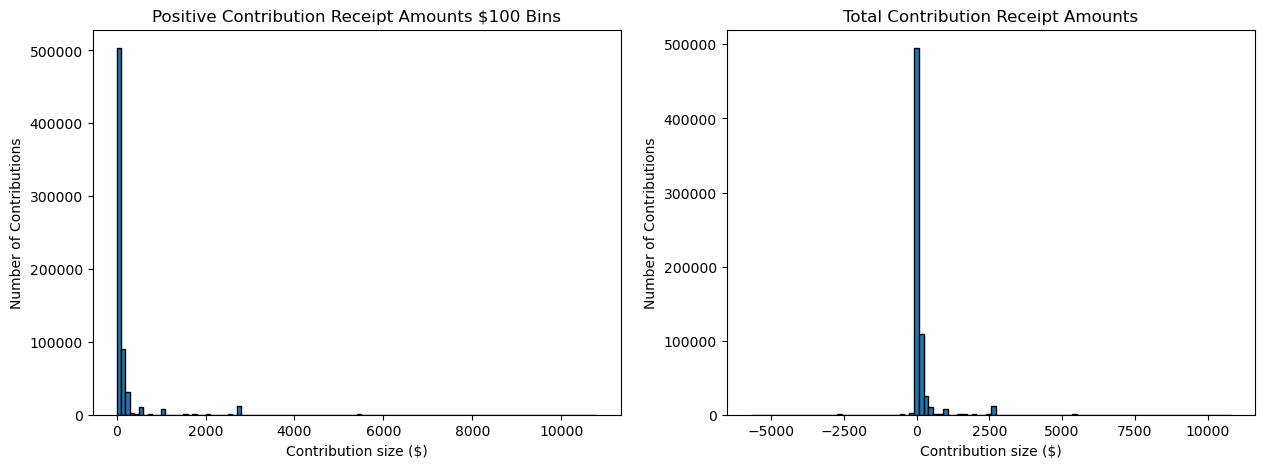

In [113]:
# 1a YOUR CODE HERE
plt.close('all')  # Clearing empty plots previosuly created

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,2,1)

bin_width = 100
max = (contrib['contb_receipt_amt'].max())
bins = np.arange(0, max + bin_width, bin_width)

# Create a Positive Contribution Plot with known bin sizes ($100)
plt.hist(contrib['contb_receipt_amt'], bins = bins, edgecolor = "black")
plt.title('Positive Contribution Receipt Amounts $100 Bins')
plt.ylabel('Number of Contributions')
plt.xlabel('Contribution size ($)')


# Create a Total Contribution Plot to see the total distribution
ax2 = fig.add_subplot(1,2,2)
plt.hist(contrib['contb_receipt_amt'], bins = 100, edgecolor = "black")
plt.title('Total Contribution Receipt Amounts')
plt.ylabel('Number of Contributions')
plt.xlabel('Contribution size ($)')

plt.show()

- **1a answer here: By far the largest range of contributions is between $0 - $100.  There are around 500,000 contributions in this range.  The second largest range is from $100-$200, with somewhere around 95,000 Contributions.  Finally, the third largest group is from $200-$300 with around 30,000 contributions (based on the chart)** 

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

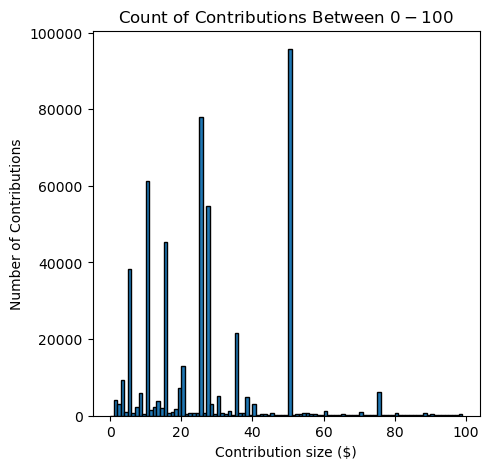

In [114]:
# 1b YOUR CODE HERE
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)

bins = np.arange(0, 100, 1)

# Create a Positive Contribution Plot with known bin sizes ($100)
plt.hist(contrib['contb_receipt_amt'], bins = bins, edgecolor = "black")
plt.title('Count of Contributions Between $0-$100')
plt.ylabel('Number of Contributions')
plt.xlabel('Contribution size ($)')

plt.show()

- **1b answer here: From these two charts, we can tell that most people are going to donate less than $100.  Within the $100 bucket, the most common donation amounts are $50, $25, and $10.  This is likely due to these being nice round numbers of common denominations.** 

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

/tmp/ipykernel_1535582/939243987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bernie_df.sort_values(by='contb_receipt_dt', ascending = True, inplace=True)
/tmp/ipykernel_1535582/939243987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hillary_df.sort_values(by = 'contb_receipt_dt', ascending = True, inplace = True)


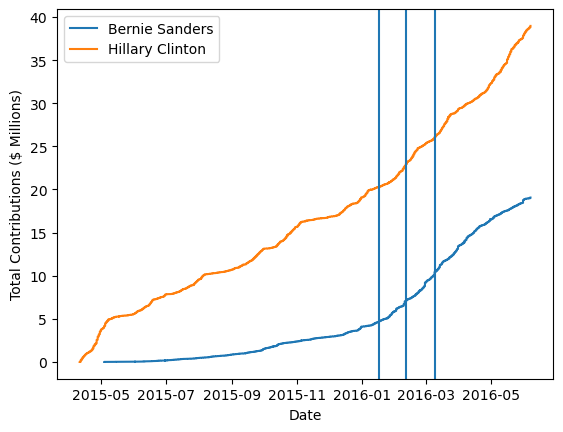

In [ ]:
# 1c YOUR CODE HERE
plt.close('all')


bernie_df = contrib[contrib['cand_id'] == 'P60007168']
hillary_df = contrib[contrib['cand_id'] == 'P00003392']

bernie_df.sort_values(by='contb_receipt_dt', ascending = True, inplace=True)  #  Sorting by date
hillary_df.sort_values(by = 'contb_receipt_dt', ascending = True, inplace = True)  #  Sorting by date

fig, ax = plt.subplots(1,1)

plt.plot(bernie_df['contb_receipt_dt'], bernie_df['contb_receipt_amt'].cumsum()/1000000, label = 'Bernie Sanders')  #  Cumulative Sum in Millions
plt.plot(hillary_df['contb_receipt_dt'], hillary_df['contb_receipt_amt'].cumsum()/1000000, label = 'Hillary Clinton')  #  Cumulative Sum in Millions
plt.xlabel('Date')
plt.ylabel('Total Contributions ($ Millions)')
plt.legend()

plt.axvline(pd.to_datetime('2016-01-17'))  # Verical Lines for Primary
plt.axvline(pd.to_datetime('2016-02-11'))
plt.axvline(pd.to_datetime('2016-03-09'))

plt.show()

- **1c answer here: Funding for both candidates increased after the debates, however, the effect was much more dramatic for Bernie Sanders.  Hillary already had steady contribution growth prior to the debates, reaching around $20M in funding.  Bernie on the other hand, had flatter contributions prior to the debates, only bringing in around $4M in total funding.  The debates were clearly more positive for him than for Hillary.** 

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [ ]:
# 2a YOUR CODE HERE

Total_donations = (
    contrib[contrib['contb_receipt_amt']>0]  #  Filtering to positive Contributions only
    .groupby('cand_nm')  # grouping by candidate name
    .size()  # Counting the number of positive rows
    .reset_index(name = 'Donation Count')  # changing this count into a column of it's own
    .sort_values(by='Donation Count', ascending = False)  # sorting in descending order
)

Total_donations.head()

,cand_nm,Donation Count
18,"Sanders, Bernard",376990
3,"Clinton, Hillary Rodham",169231
4,"Cruz, Rafael Edward 'Ted'",55158
1,"Carson, Benjamin S.",26736
17,"Rubio, Marco",12730


- **2a answer here: When considering positive contributions only, Bernie Sanders had the largest number of contributions at 376,990.  Hillary was in second with 169,231.** 

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [152]:
# 2b YOUR CODE HERE

Contribution_sums = (
    contrib[contrib['contb_receipt_amt'] > 0]
    .groupby('cand_nm')['contb_receipt_amt']
    .sum()
    .reset_index(name = 'Sum Total Contributions')
    .sort_values(by = 'Sum Total Contributions', ascending = False)
)

Contribution_sums.head()

,cand_nm,Sum Total Contributions
3,"Clinton, Hillary Rodham","39,629,060.79"
18,"Sanders, Bernard","19,811,397.13"
4,"Cruz, Rafael Edward 'Ted'","6,599,501.11"
17,"Rubio, Marco","5,789,867.92"
0,"Bush, Jeb","3,448,920.23"


- **2b answer here:  The most money was raised by Hillary Clinton, at $39 Million.** 

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [ ]:
# 2c YOUR CODE HERE

merged_table = pd.merge(Total_donations, Contribution_sums, on = 'cand_nm')

merged_table.head()

,cand_nm,Donation Count,Sum Total Contributions
0,"Sanders, Bernard",376990,"19,811,397.13"
1,"Clinton, Hillary Rodham",169231,"39,629,060.79"
2,"Cruz, Rafael Edward 'Ted'",55158,"6,599,501.11"
3,"Carson, Benjamin S.",26736,"3,192,542.51"
4,"Rubio, Marco",12730,"5,789,867.92"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [158]:
# 2d YOUR CODE HERE
merged_table['Average Donation'] = merged_table['Sum Total Contributions']/ merged_table['Donation Count']

merged_table.head()
merged_table.sort_values('Average Donation', ascending=False)

,cand_nm,Donation Count,Sum Total Contributions,Average Donation
23,"Gilmore, James S III",3,"8,100.00","2,700.00"
18,"Perry, James R. (Rick)",103,"208,425.00","2,023.54"
22,"Pataki, George E.",20,"30,450.00","1,522.50"
14,"Christie, Christopher J.",323,"482,866.00","1,494.94"
15,"Graham, Lindsey O.",286,"422,995.00","1,479.00"
8,"Bush, Jeb",2950,"3,448,920.23","1,169.13"
10,"Walker, Scott",620,"614,506.90",991.14
12,"O'Malley, Martin Joseph",390,"302,234.26",774.96
21,"Jindal, Bobby",31,"23,231.26",749.40
17,"Webb, James Henry Jr.",106,"76,568.16",722.34


- **2d answer here: James S Gilmore III had the highest average donation amount at $2,700 over 3 donations.** 

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

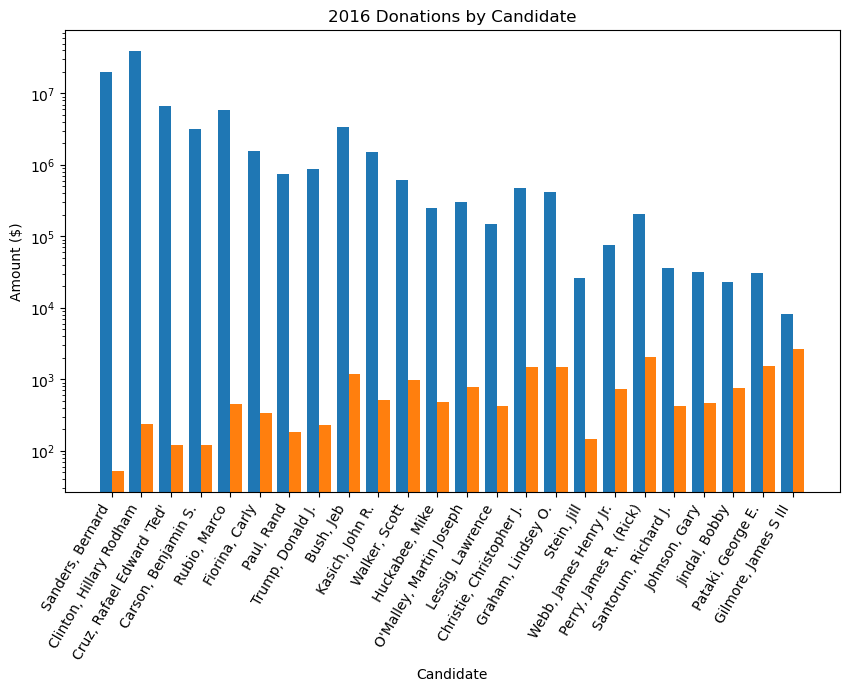

In [167]:
# 2e YOUR CODE HERE

candidates = merged_table['cand_nm']
sums = merged_table['Sum Total Contributions']
avgs = merged_table['Average Donation']

x = np.arange(len(candidates))
width = 0.4

plt.figure(figsize = (10,6))
plt.bar(x-width/2, sums, width, label = 'Total Contributions')
plt.bar(x + width/2, avgs, width, label = 'Average Contribution')


plt.title('2016 Donations by Candidate')
plt.xlabel('Candidate')
plt.xticks(x, candidates, rotation = 60, ha = 'right')
plt.ylabel('Amount ($)')
plt.yscale('log')

plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here: There seems to be an inverse relationship to the total amount of donations, and the average size of each donation.  If you appeal to the masses, you'll get a lot of donations but at a smaller amount.  If you appeal to a smaller group, though, you'll get larger donations but a smaller number of donations.** 

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [175]:
# 3a YOUR CODE HERE
hillary_df.value_counts('contbr_occupation').head(5)

contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [181]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return df.value_counts('contbr_occupation').head(5)


**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [191]:
# 3c YOUR CODE HERE
print("Hillary Clinton\n")
print(get_donors(contrib[contrib['cand_nm'] == "Clinton, Hillary Rodham"]))

print("\nBernie Sanders\n")
print(get_donors(contrib[contrib['cand_nm'] == "Sanders, Bernard"]))

print("\nDonald Trump\n")
print(get_donors(contrib[contrib['cand_nm'] == "Trump, Donald J."]))


Hillary Clinton

contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

Bernie Sanders

contbr_occupation
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: count, dtype: int64

Donald Trump

contbr_occupation
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: count, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [198]:
# 3d YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)

/tmp/ipykernel_1535582/2788809950.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  contrib.groupby('cand_nm').apply(get_donors)


cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here: The number one occupation across all of the candidates appears to be "Retired".  This makes logical sense, since a lot of older Americans are more involved in the political process.  Additionaly, Bernie's largest occupation is "Not Employed" and by a very large margin (98K Not Employed and 15K Retired).  This makes sense for Bernie Sanders due to the nature of his campaign which was highly focused on income equality, higher minimum wages, and free public college.  This also makes sense why a lot of his donation amounts were smaller - the vast majority of people who donated to him did not have jobs and couldn't spare much money on his campaign. ** 

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here: Yes, as stated above, Bernie Sanders, while having the largest number of total donations, failed to raise more money than Hillary Clinton.  This is likely due to the type of individuals that each candidate attracted.  Bernie Sanders in particular, who made is whole campaign appealing to lower income individuals, brought it the smallest average donation size, but the largest overall numbner of donations.  This would suggest that the people donating to his campaign didn't have a lot of money to spare, and when looking at the occupation data, confirms this idea since the vast majority were unemployed.** 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k